# Taller 3. Comparte tu Análisis bivariado
- Juan Sebastián Orozco Hernández 
- Yenny Alexandra Villarreal Suaza
- Cristian Humberto Yepes Marín
- Fredy Yamid Alvarez Palechor

**Realización del Análisis Bivariado en Python (3 puntos)**

- Seleccionar dos variables de un conjunto de datos y justificar su elección.
- Calcular estadísticas que describan la relación entre las variables (correlación, tablas de contingencia, etc.).
- Generar visualizaciones apropiadas, como:
    * Diagramas de dispersión (para variables numéricas).
    * Boxplots comparativos (para una variable numérica y una categórica).
    * Heatmaps de correlación (para múltiples variables numéricas).
    * Gráficos de barras o stacked charts (para variables categóricas).
- Interpretar las tendencias y patrones observados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns


In [3]:

df = pd.read_csv('Data/DatosAreaMolinos.csv', sep=";")

In [ ]:
df

**Diccionario de datos**


In [20]:
df_variables = pd.read_excel('Diccionario.xlsx', sheet_name='Total_Variables')
df_variables[['Nombre ', 'Descripcion ']].drop_duplicates(subset=['Nombre '])

,Nombre,Descripcion
0,LECBRIXSOLUT2,Lectura Brix Solucion Jugo Diluido T2
1,PUREZAJUGDILT2,% PUREZA JUGO DILUIDO TANDEM 2
2,%PUREZJUGO1EXT2,%PUREZA JUGO PRIMERA EXTRACCION T2
3,BZSAC,% SACAROSA BAGAZO TANDEM 2
4,%HUMBZOT2,% HUMEDAD BAGAZO TANDEM 2
5,%REDUCTOJDILT2,% REDUCTORES JUGO DILUIDO T2
6,PHJUGODILUIDOT2,pH Jugo Diluido T2
7,FOSFATOSJDILT2,FOSFATOS JUGO DILUIDO T2
8,COLORJUGODILT2,COLOR FILTRADO JUGO DILUIDO TANDEM 2
9,TURBIEDADJDILT2,TURBIEDAD JUGO DILUIDO TANDEM 2


**Analisis de Dataset**

In [ ]:
df.head()

,Time,201_LECBRIXSOLUT2,201_PUREZAJUGDILT2,201_%PUREZJUGO1EXT2,201_%HUMBZOT2,BZSAC,201_%REDUCTOJDILT2,201_PHJUGODILUIDOT2,201_FOSFATOSJDILT2,201_COLORJUGODILT2,...,100_MURRAY3_ST_PV,100_MURRAY4_ST_PV,100_BOMBA_MACE01_IT_PV,100_BOMBA_MACE04_IT_PV,100_BOMBA_MACE05_IT_PV,100_MACERACION_FIBRA_PV,100_BANDA96_ST_PV,100_MURRAY1_ST_PV,100_MURRAY2_ST_PV,100_MURRAY5_ST_PV
0,01/02/2025 5:00,NaN,NaN,NaN,NaN,NaN,0.85,5.15,329.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/2025 2:00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/2025 5:00,NaN,NaN,NaN,NaN,NaN,0.66,5.28,400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/04/2025 2:00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/04/2025 5:00,NaN,NaN,NaN,NaN,NaN,0.58,5.40,398.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail()

,Time,201_LECBRIXSOLUT2,201_PUREZAJUGDILT2,201_%PUREZJUGO1EXT2,201_%HUMBZOT2,BZSAC,201_%REDUCTOJDILT2,201_PHJUGODILUIDOT2,201_FOSFATOSJDILT2,201_COLORJUGODILT2,...,100_MURRAY3_ST_PV,100_MURRAY4_ST_PV,100_BOMBA_MACE01_IT_PV,100_BOMBA_MACE04_IT_PV,100_BOMBA_MACE05_IT_PV,100_MACERACION_FIBRA_PV,100_BANDA96_ST_PV,100_MURRAY1_ST_PV,100_MURRAY2_ST_PV,100_MURRAY5_ST_PV
63790,8/15/2025 23:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2695.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63791,8/15/2025 23:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2705.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63792,8/15/2025 23:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2695.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63793,8/15/2025 23:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2705.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63794,8/15/2025 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2969.0,2695.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0


In [11]:
df.shape

(63795, 30)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63795 entries, 0 to 63794
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     63795 non-null  object 
 1   201_LECBRIXSOLUT2        432 non-null    float64
 2   201_PUREZAJUGDILT2       432 non-null    float64
 3   201_%PUREZJUGO1EXT2      1394 non-null   float64
 4   201_%HUMBZOT2            429 non-null    float64
 5   BZSAC                    431 non-null    float64
 6   201_%REDUCTOJDILT2       586 non-null    float64
 7   201_PHJUGODILUIDOT2      228 non-null    float64
 8   201_FOSFATOSJDILT2       225 non-null    float64
 9   201_COLORJUGODILT2       95 non-null     float64
 10  201_TURBIEDADJDILT2      95 non-null     float64
 11  100_AG_IMBICION_TT_PV    62052 non-null  float64
 12  100_MOL1_DER_PT_PV       62053 non-null  float64
 13  100_MOL1_IZQ_PT_PV       62053 non-null  float64
 14  100_MOL2_DER_PT_PV    

In [12]:
df.describe()

,201_LECBRIXSOLUT2,201_PUREZAJUGDILT2,201_%PUREZJUGO1EXT2,201_%HUMBZOT2,BZSAC,201_%REDUCTOJDILT2,201_PHJUGODILUIDOT2,201_FOSFATOSJDILT2,201_COLORJUGODILT2,201_TURBIEDADJDILT2,...,100_MURRAY3_ST_PV,100_MURRAY4_ST_PV,100_BOMBA_MACE01_IT_PV,100_BOMBA_MACE04_IT_PV,100_BOMBA_MACE05_IT_PV,100_MACERACION_FIBRA_PV,100_BANDA96_ST_PV,100_MURRAY1_ST_PV,100_MURRAY2_ST_PV,100_MURRAY5_ST_PV
count,432.000000,432.000000,1394.000000,429.000000,431.000000,586.000000,228.000000,225.000000,95.000000,95.000000,...,51715.000000,51715.000000,51620.000000,51715.000000,51374.000000,51652.000000,51715.000000,51715.000000,51715.000000,51715.000000
mean,13.596528,83.093519,85.700861,45.537529,1.249861,0.726536,5.188684,295.671111,23791.010526,202975.705263,...,2893.057529,2738.722382,26.260521,25.775262,27.380728,25.651847,44.304264,773.185020,660.130237,722.467081
std,0.655735,1.985120,4.231591,1.698299,0.209807,0.141458,1.173108,68.593057,5164.282363,48985.560573,...,614.018355,518.044050,8.611987,8.459177,8.676164,8.673618,14.873148,153.924843,150.020045,156.265405
min,11.000000,74.400000,0.000000,40.900000,0.000000,0.000000,0.000000,0.000000,13429.000000,130429.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.200000,81.900000,84.800000,44.300000,1.120000,0.640000,5.200000,264.000000,19714.000000,161979.500000,...,2799.000000,2696.000000,28.300000,27.700000,29.100000,27.700000,46.600000,798.000000,621.000000,676.000000
50%,13.600000,83.300000,86.300000,45.400000,1.230000,0.720000,5.290000,286.000000,23286.000000,204429.000000,...,2959.000000,2777.000000,28.800000,28.300000,29.700000,28.300000,47.500000,798.000000,681.000000,736.000000
75%,14.000000,84.500000,87.400000,46.500000,1.340000,0.800000,5.360000,312.000000,27369.000000,230368.500000,...,3169.000000,2925.000000,29.200000,28.900000,30.400000,28.900000,48.300000,817.000000,741.000000,796.000000
max,15.600000,87.300000,102.000000,51.200000,2.700000,1.240000,12.800000,624.000000,37333.000000,338200.000000,...,4102.000000,3717.000000,100.000000,44.100000,64.900000,44.000000,100.000000,857.000000,861.000000,1055.000000


**Limpieza de datos**

Cómo la variable objetivo BZSAC (% de Sacaroza en el bagazo) solo tiene registros desde 09/07/2025  4:00:00 se eliminaran los datos o muestras tomadas anterior a esta fecha.

In [8]:

# 1. Asegúrate de que la columna de fecha (ej. 'fecha') es de tipo datetime
# Reemplaza 'nombre_de_tu_columna_de_fecha' con el nombre real de tu columna
df['Time'] = pd.to_datetime(df['Time'])

# 2. Define la fecha de corte
fecha_de_corte = '07/09/2025 04:00:00'

# 3. Filtra el DataFrame para quedarte solo con las fechas iguales o posteriores
df_filtrado = df[df['Time'] >= fecha_de_corte].copy()

# Opcional: Si quieres modificar el DataFrame original en lugar de crear uno nuevo
# df.drop(df[df['nombre_de_tu_columna_de_fecha'] < fecha_de_corte].index, inplace=True)

# 4. Imprime las primeras filas del nuevo DataFrame para verificar
print(df_filtrado.head())

                     Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
18306 2025-07-09 04:00:00               13.2                83.0   
18307 2025-07-09 04:00:00                NaN                 NaN   
18308 2025-07-09 04:01:00                NaN                 NaN   
18309 2025-07-09 04:03:00                NaN                 NaN   
18310 2025-07-09 04:04:00                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
18306                 86.4           45.1   1.21                 NaN   
18307                  NaN            NaN    NaN                 NaN   
18308                  NaN            NaN    NaN                 NaN   
18309                  NaN            NaN    NaN                 NaN   
18310                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
18306                  NaN                 NaN             25857.0  ...   
18307   

In [9]:
df_filtrado

,Time,201_LECBRIXSOLUT2,201_PUREZAJUGDILT2,201_%PUREZJUGO1EXT2,201_%HUMBZOT2,BZSAC,201_%REDUCTOJDILT2,201_PHJUGODILUIDOT2,201_FOSFATOSJDILT2,201_COLORJUGODILT2,...,100_MURRAY3_ST_PV,100_MURRAY4_ST_PV,100_BOMBA_MACE01_IT_PV,100_BOMBA_MACE04_IT_PV,100_BOMBA_MACE05_IT_PV,100_MACERACION_FIBRA_PV,100_BANDA96_ST_PV,100_MURRAY1_ST_PV,100_MURRAY2_ST_PV,100_MURRAY5_ST_PV
18306,2025-07-09 04:00:00,13.2,83.0,86.4,45.1,1.21,NaN,NaN,NaN,25857.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18307,2025-07-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3057.0,2905.0,30.2,28.2,29.4,27.2,46.6,798.0,680.0,776.0
18308,2025-07-09 04:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3038.0,2915.0,29.1,29.0,30.8,27.1,46.6,798.0,801.0,736.0
18309,2025-07-09 04:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2908.0,3005.0,29.5,28.4,29.7,26.6,0.0,798.0,781.0,716.0
18310,2025-07-09 04:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3167.0,2894.0,29.5,28.7,30.8,0.0,0.0,798.0,680.0,796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63790,2025-08-15 23:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2695.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63791,2025-08-15 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2705.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63792,2025-08-15 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2695.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0
63793,2025-08-15 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,2705.0,0.0,0.0,0.0,0.0,0.0,758.0,580.0,776.0


In [10]:
df_filtrado.shape

(45489, 30)

# **Resaresampling de las variables**

In [21]:
# Convertir la columna "Time" a tipo datetime
df_filtrado["Time"] = pd.to_datetime(df_filtrado["Time"], errors="coerce")

# Establecer "Time" como índice
df_resample = df_filtrado.set_index("Time")

# Ejemplo: resamplear a intervalos de 1 hora y calcular la media
df_resample_1h = df_resample.resample("3H").mean()

df_resample_1h.to_csv('variables_resapleadas.csv')

# Mostrar las primeras filas del dataframe resampleado
df_resample_1h.head()

C:\Users\yeavi\AppData\Local\Temp\ipykernel_6848\793187106.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resample_1h = df_resample.resample("3H").mean()


,201_LECBRIXSOLUT2,201_PUREZAJUGDILT2,201_%PUREZJUGO1EXT2,201_%HUMBZOT2,BZSAC,201_%REDUCTOJDILT2,201_PHJUGODILUIDOT2,201_FOSFATOSJDILT2,201_COLORJUGODILT2,201_TURBIEDADJDILT2,...,100_MURRAY3_ST_PV,100_MURRAY4_ST_PV,100_BOMBA_MACE01_IT_PV,100_BOMBA_MACE04_IT_PV,100_BOMBA_MACE05_IT_PV,100_MACERACION_FIBRA_PV,100_BANDA96_ST_PV,100_MURRAY1_ST_PV,100_MURRAY2_ST_PV,100_MURRAY5_ST_PV
Time,,,,,,,,,,,,,,,,,,,,,
2025-07-09 03:00:00,12.9,83.10,82.1,46.15,1.18,0.79,5.14,272.0,25857.0,177429.0,...,3085.543860,2980.350877,28.241228,27.604386,28.935965,27.771053,45.506140,798.000000,723.333333,776.228070
2025-07-09 06:00:00,13.6,84.40,87.9,47.30,1.07,NaN,NaN,NaN,NaN,NaN,...,2912.812865,2830.748538,28.453801,27.810526,29.023977,27.729825,46.328655,798.000000,678.614035,725.707602
2025-07-09 09:00:00,13.4,86.20,86.1,45.10,1.05,NaN,NaN,NaN,NaN,NaN,...,2886.105263,2764.847953,29.429825,28.362573,29.937427,28.486550,45.452047,798.000000,670.654971,686.900585
2025-07-09 12:00:00,12.9,84.15,84.6,45.25,1.12,0.73,NaN,NaN,NaN,NaN,...,2876.343023,2762.540698,29.088372,28.279070,29.773256,28.031977,47.529942,797.040698,668.773256,692.052326
2025-07-09 15:00:00,13.2,83.70,84.9,44.40,0.97,NaN,NaN,NaN,NaN,NaN,...,2910.204678,2787.824561,29.072515,28.383041,29.745029,28.276608,50.399415,797.584795,670.976608,657.713450


In [13]:
df_resample_1h.shape

(454, 29)

In [15]:
df_resample_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 454 entries, 2025-07-09 04:00:00 to 2025-08-15 22:00:00
Freq: 2h
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   201_LECBRIXSOLUT2        396 non-null    float64
 1   201_PUREZAJUGDILT2       396 non-null    float64
 2   201_%PUREZJUGO1EXT2      270 non-null    float64
 3   201_%HUMBZOT2            393 non-null    float64
 4   BZSAC                    395 non-null    float64
 5   201_%REDUCTOJDILT2       115 non-null    float64
 6   201_PHJUGODILUIDOT2      38 non-null     float64
 7   201_FOSFATOSJDILT2       38 non-null     float64
 8   201_COLORJUGODILT2       39 non-null     float64
 9   201_TURBIEDADJDILT2      39 non-null     float64
 10  100_AG_IMBICION_TT_PV    414 non-null    float64
 11  100_MOL1_DER_PT_PV       414 non-null    float64
 12  100_MOL1_IZQ_PT_PV       414 non-null    float64
 13  100_MOL2_DER_PT_PV       414 non-n

In [16]:
df_resample_1h.describe()

,201_LECBRIXSOLUT2,201_PUREZAJUGDILT2,201_%PUREZJUGO1EXT2,201_%HUMBZOT2,BZSAC,201_%REDUCTOJDILT2,201_PHJUGODILUIDOT2,201_FOSFATOSJDILT2,201_COLORJUGODILT2,201_TURBIEDADJDILT2,...,100_MURRAY3_ST_PV,100_MURRAY4_ST_PV,100_BOMBA_MACE01_IT_PV,100_BOMBA_MACE04_IT_PV,100_BOMBA_MACE05_IT_PV,100_MACERACION_FIBRA_PV,100_BANDA96_ST_PV,100_MURRAY1_ST_PV,100_MURRAY2_ST_PV,100_MURRAY5_ST_PV
count,396.000000,396.000000,270.000000,393.000000,395.000000,115.000000,38.000000,38.000000,39.000000,39.000000,...,414.000000,414.000000,414.000000,414.000000,412.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,13.603283,83.118182,83.908704,45.515267,1.256557,0.861739,5.258158,286.289474,22349.692308,172556.679487,...,2883.251238,2718.647801,26.043197,25.526226,27.133487,25.446165,44.104144,768.722902,655.642100,721.360653
std,0.646119,1.936573,3.623897,1.642549,0.209677,0.141788,0.219174,31.953436,4914.168578,41774.906600,...,541.378584,463.551559,6.282912,6.308110,6.319377,6.202024,10.402923,142.106586,123.135129,133.356063
min,11.000000,74.400000,66.700000,40.900000,0.000000,0.000000,4.890000,211.000000,13429.000000,130429.000000,...,0.047983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004200,0.000000
25%,13.200000,82.000000,82.400000,44.400000,1.130000,0.780000,5.110000,268.500000,19500.000000,142916.500000,...,2907.908257,2743.235074,26.855189,26.381970,27.959545,26.227647,44.627778,796.914474,665.042273,713.449541
50%,13.600000,83.300000,84.500000,45.400000,1.230000,0.850000,5.215000,287.000000,21714.000000,161571.500000,...,2987.315725,2808.214593,28.450221,28.196346,29.496404,28.035770,47.204032,798.000000,682.467890,743.272727
75%,14.000000,84.500000,86.275000,46.500000,1.345000,0.970000,5.377500,302.000000,26214.000000,178357.000000,...,3077.322310,2875.736989,28.964586,28.450996,30.013278,28.478771,48.342661,817.585884,700.548504,780.000965
max,15.600000,87.300000,102.000000,51.200000,2.700000,1.140000,5.990000,385.000000,33000.000000,330166.000000,...,3491.133333,3192.818182,31.618349,29.032110,34.917431,29.322430,63.078378,838.000000,762.209091,878.366972


**Se analizan las variables con valores nulos**

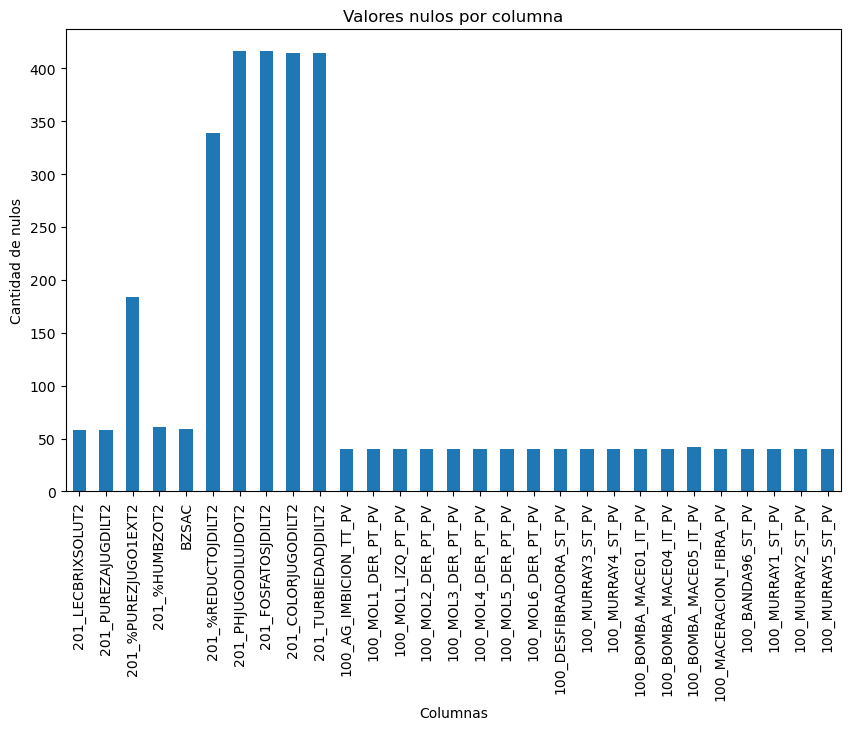

In [19]:
# Contar valores nulos por columna
nulos = df_resample_1h.isnull().sum()

# Filtrar solo las columnas que tienen nulos
nulos = nulos[nulos > 0]

# Crear gráfico de barras
plt.figure(figsize=(10,6))
nulos.plot(kind="bar")
plt.title("Valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=90)
plt.show()

**Se grafica cada variable para analizar la distribucion y el resumen estadistico**

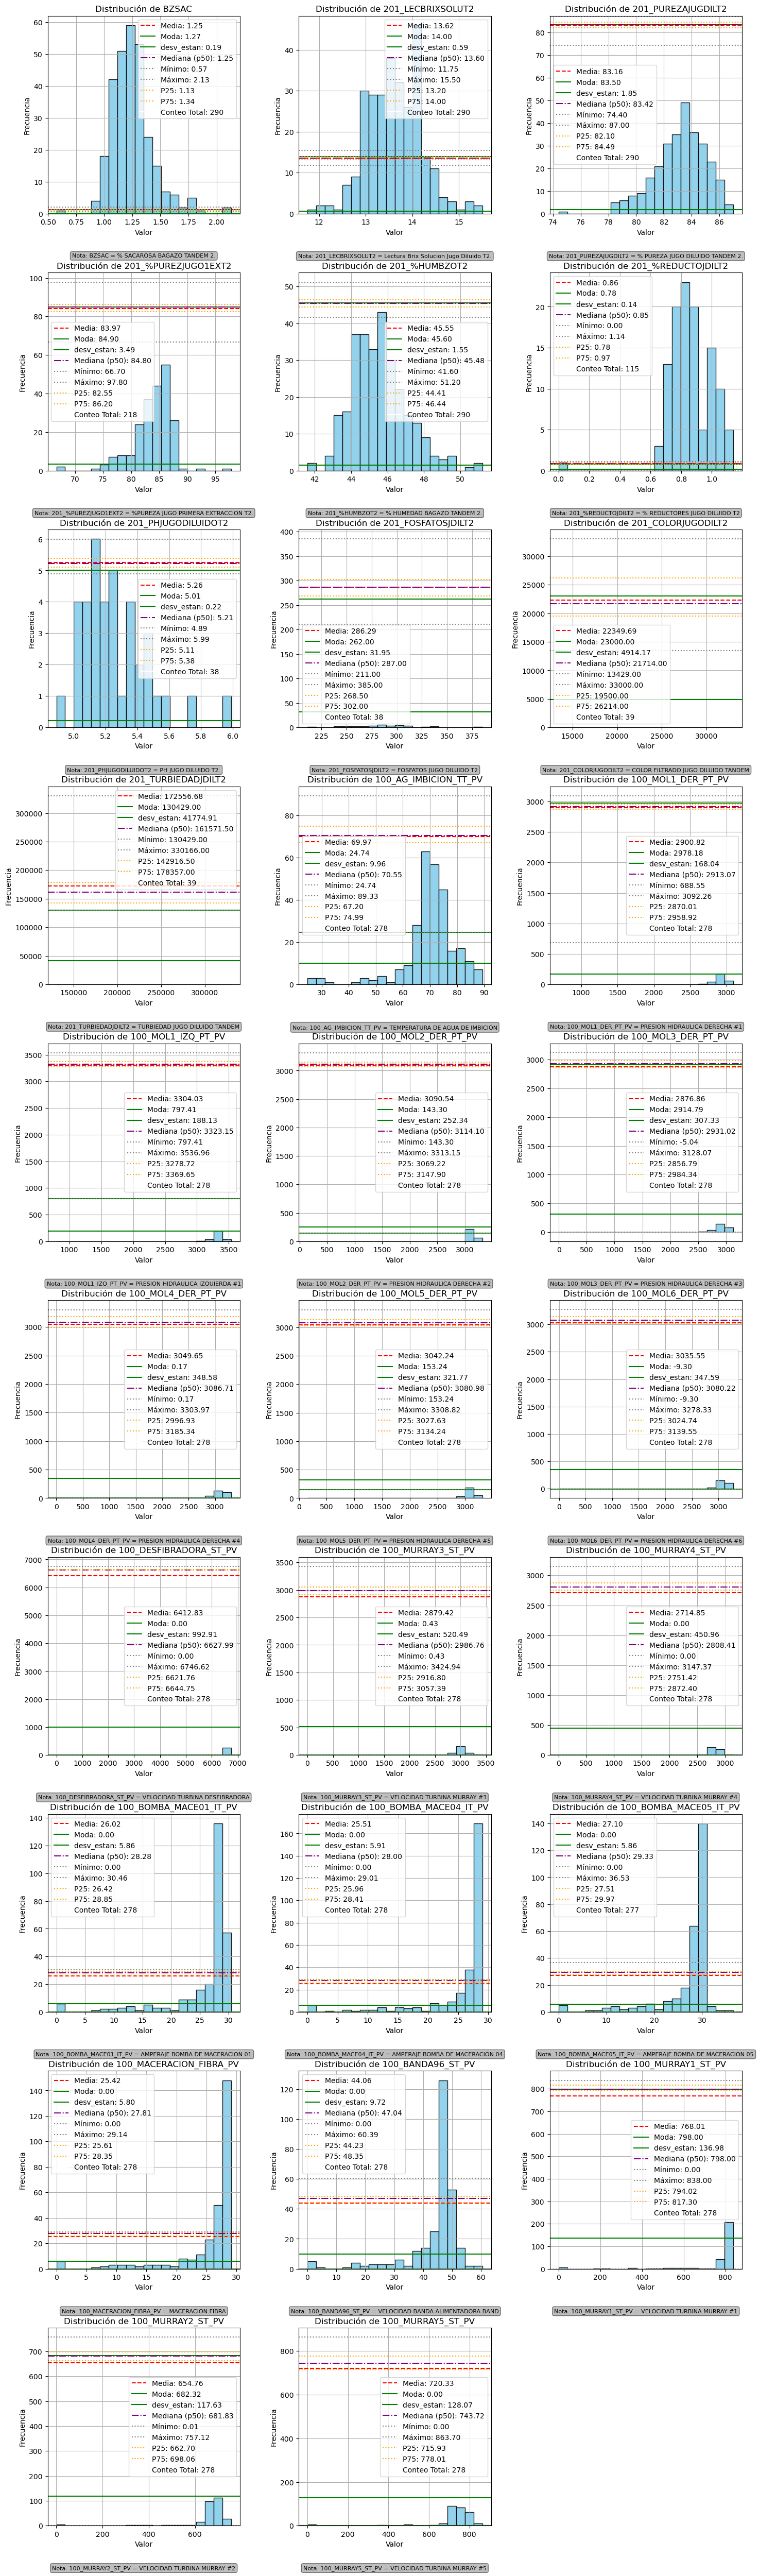

In [28]:
import matplotlib.pyplot as plt

# Diccionario con los nombres de las columnas que quieres graficar y sus descripciones
# Asegúrate de que estos nombres de columna existan en tu DataFrame
columnas_dict = {
    'BZSAC': '% SACAROSA BAGAZO TANDEM 2.',
    '201_LECBRIXSOLUT2': 'Lectura Brix Solucion Jugo Diluido T2.',
    '201_PUREZAJUGDILT2': '% PUREZA JUGO DILUIDO TANDEM 2.',
    # Añade aquí tus otras columnas de la segunda fila
    '201_%PUREZJUGO1EXT2': '%PUREZA JUGO PRIMERA EXTRACCION T2.',
    '201_%HUMBZOT2': '% HUMEDAD BAGAZO TANDEM 2.',
    '201_%REDUCTOJDILT2': '% REDUCTORES JUGO DILUIDO T2',
    '201_PHJUGODILUIDOT2': 'PH JUGO DILUIDO T2.',
    '201_FOSFATOSJDILT2': 'FOSFATOS JUGO DILUIDO T2',
    '201_COLORJUGODILT2': 'COLOR FILTRADO JUGO DILUIDO TANDEM',
    '201_TURBIEDADJDILT2': 'TURBIEDAD JUGO DILUIDO TANDEM',
    '100_AG_IMBICION_TT_PV': 'TEMPERATURA DE AGUA DE IMBICIÓN',
    '100_MOL1_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #1',
    '100_MOL1_IZQ_PT_PV': 'PRESION HIDRAULICA IZQUIERDA #1',
    '100_MOL2_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #2',
    '100_MOL3_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #3',
    '100_MOL4_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #4',
    '100_MOL5_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #5',
    '100_MOL6_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #6',
    '100_DESFIBRADORA_ST_PV': 'VELOCIDAD TURBINA DESFIBRADORA',
    '100_MURRAY3_ST_PV': 'VELOCIDAD TURBINA MURRAY #3',
    '100_MURRAY4_ST_PV': 'VELOCIDAD TURBINA MURRAY #4',
    '100_BOMBA_MACE01_IT_PV': 'AMPERAJE BOMBA DE MACERACION 01',
    '100_BOMBA_MACE04_IT_PV': 'AMPERAJE BOMBA DE MACERACION 04',
    '100_BOMBA_MACE05_IT_PV': 'AMPERAJE BOMBA DE MACERACION 05',
    '100_MACERACION_FIBRA_PV': 'MACERACION FIBRA',
    '100_BANDA96_ST_PV': 'VELOCIDAD BANDA ALIMENTADORA BAND',
    '100_MURRAY1_ST_PV': 'VELOCIDAD TURBINA MURRAY #1',
    '100_MURRAY2_ST_PV': 'VELOCIDAD TURBINA MURRAY #2',
    '100_MURRAY5_ST_PV': 'VELOCIDAD TURBINA MURRAY #5'
}

# La lista de columnas se crea automáticamente a partir del diccionario
columnas_a_graficar = list(columnas_dict.keys())
num_columnas = 3
num_filas = (len(columnas_a_graficar) + num_columnas - 1) // num_columnas

# Crear subplots de forma dinámica
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las columnas para crear cada gráfico
for i, (col, desc) in enumerate(columnas_dict.items()):
    # Crear el histograma
    axes[i].hist(df_resample_1h[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.9)
    axes[i].grid(True)
    
    # Calcular las métricas
    media = df_resample_1h[col].mean()
    moda = df_resample_1h[col].mode().iloc[0] if not df_resample_1h[col].mode().empty else np.nan
    minimo = df_resample_1h[col].min()  
    maximo = df_resample_1h[col].max()
    p_25 = df_resample_1h[col].quantile(0.25)
    p_50 = df_resample_1h[col].quantile(0.50)
    p_75 = df_resample_1h[col].quantile(0.75)
    conteo_total = df_resample_1h[col].count()  # Cálculo del conteo total
    desv_estand = df_resample_1h[col].std()
     

    # Añadir etiquetas y título
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

    # Añadir líneas verticales para las métricas
    axes[i].axhline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    axes[i].axhline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
    axes[i].axhline(desv_estand, color='green', linestyle='-', label=f'desv_estan: {desv_estand:.2f}')
    axes[i].axhline(p_50, color='purple', linestyle='-.', label=f'Mediana (p50): {p_50:.2f}')

    # Mostrar las métricas de máximo, mínimo y percentiles en la leyenda
    axes[i].axhline(minimo, color='gray', linestyle=':', label=f'Mínimo: {minimo:.2f}')
    axes[i].axhline(maximo, color='gray', linestyle=':', label=f'Máximo: {maximo:.2f}')
    axes[i].axhline(p_25, color='orange', linestyle=':', label=f'P25: {p_25:.2f}')
    axes[i].axhline(p_75, color='orange', linestyle=':', label=f'P75: {p_75:.2f}')

    # Añadir una línea transparente para incluir el conteo total en la leyenda
    axes[i].axhline(np.nan, color='white', linestyle='-', label=f'Conteo Total: {conteo_total}')

    axes[i].legend()

    # Añadir la nota centrada
    axes[i].text(x=0.5, y=-0.2, s=f"Nota: {col} = {desc}",
                 transform=axes[i].transAxes,
                 fontsize=8,
                 ha='center',
                 va='top',
                 bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))

# Eliminar los subplots vacíos que no se usaron
for j in range(len(columnas_a_graficar), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Ahora se realiza la matriz de correlacion**

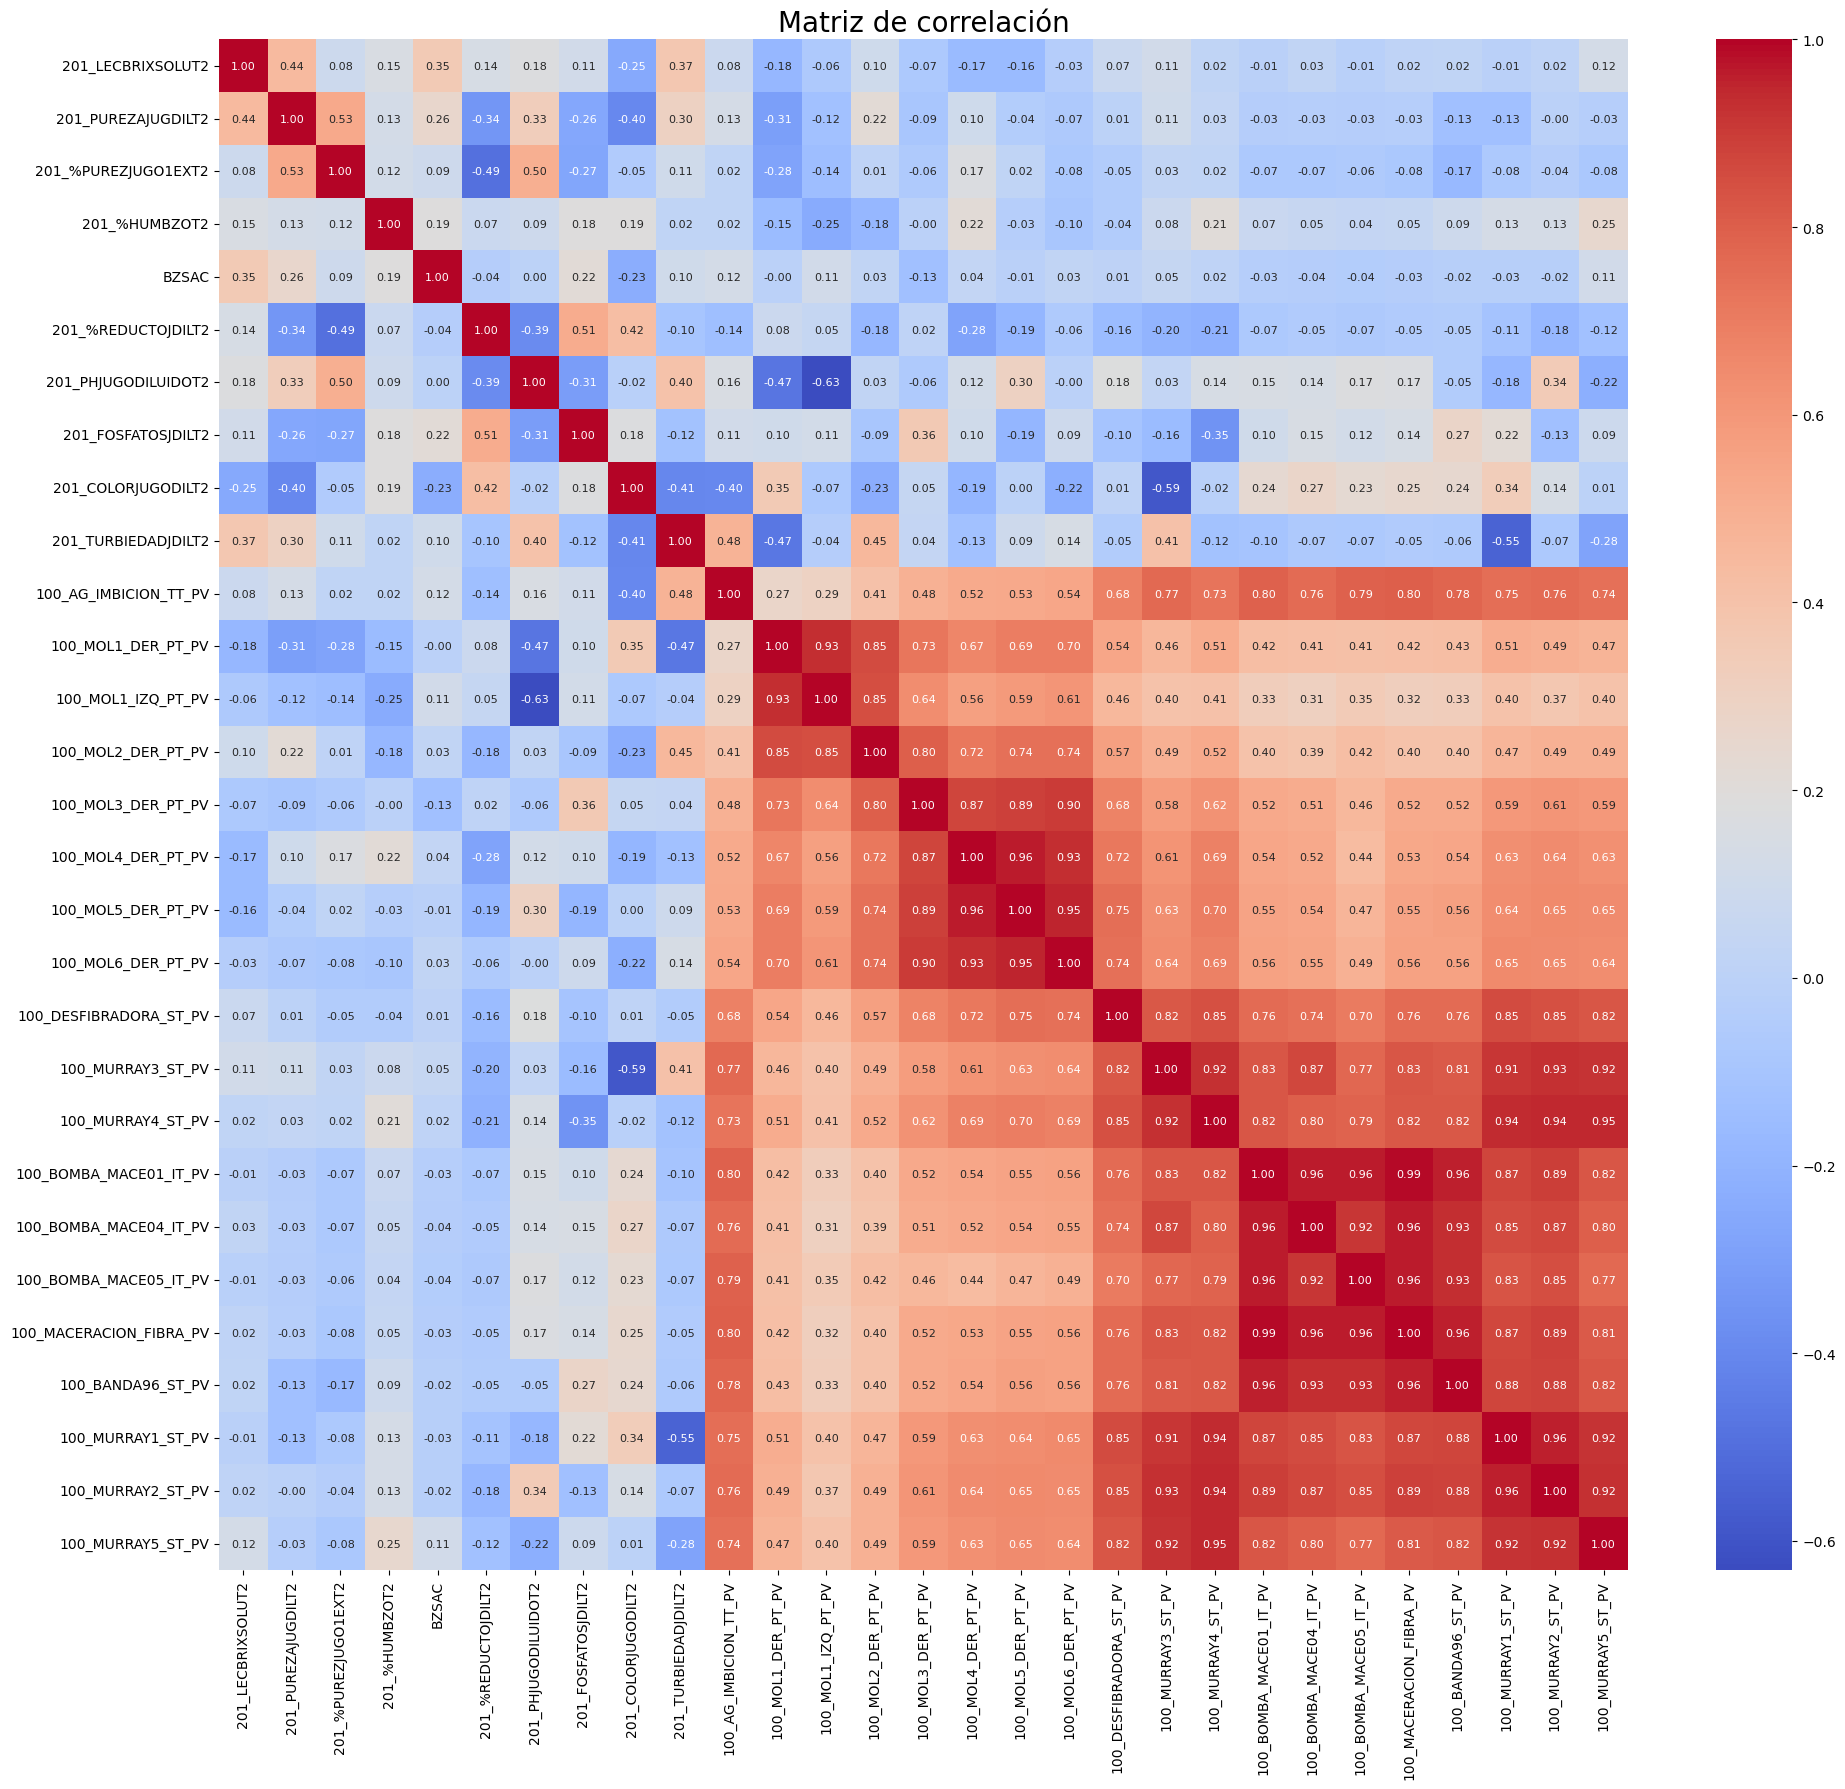

In [31]:
# 3. Calcular la matriz de correlación (Pearson por defecto)
correlation_matrix = df_resample_1h.corr(method='pearson')

# 4. Mostrar la matriz en consola (opcional, si aún la necesitas en texto)
# print("\nMatriz de correlación:")
# print(correlation_matrix)

# 5. Visualizar la correlación como mapa de calor con mejoras de legibilidad
plt.figure(figsize=(20, 18)) # <-- Aumenta significativamente el tamaño de la figura
                            # Puedes ajustar estos valores (20, 18) según la cantidad de variables
                            # y el tamaño de tu pantalla/salida.

sns.heatmap(
    correlation_matrix,
    annot=True,            # Mostrar los valores de correlación
    cmap="coolwarm",       # Mapa de color (coolwarm es bueno para correlaciones +/-)
    fmt=".2f",             # Formato a dos decimales
    annot_kws={"size": 8}  # <-- Reduce el tamaño de la fuente de las anotaciones
                            # Puedes probar con 7 o 6 si sigue habiendo superposición
)

plt.title("Matriz de correlación", fontsize=20) # <-- Ajusta el tamaño del título
plt.xticks(fontsize=10, rotation=90) # <-- Rota las etiquetas del eje X para que no se superpongan
plt.yticks(fontsize=10, rotation=0)  # <-- Ajusta el tamaño de las etiquetas del eje Y
plt.tight_layout() # <-- Ajusta automáticamente los parámetros del subplot para que quepan bien
plt.show()

**Ahora se genera la matriz de correlacion de Spearman para ver por rangos las variables continuas y se ordena descendentemente por la variable objetivo BZSAC**

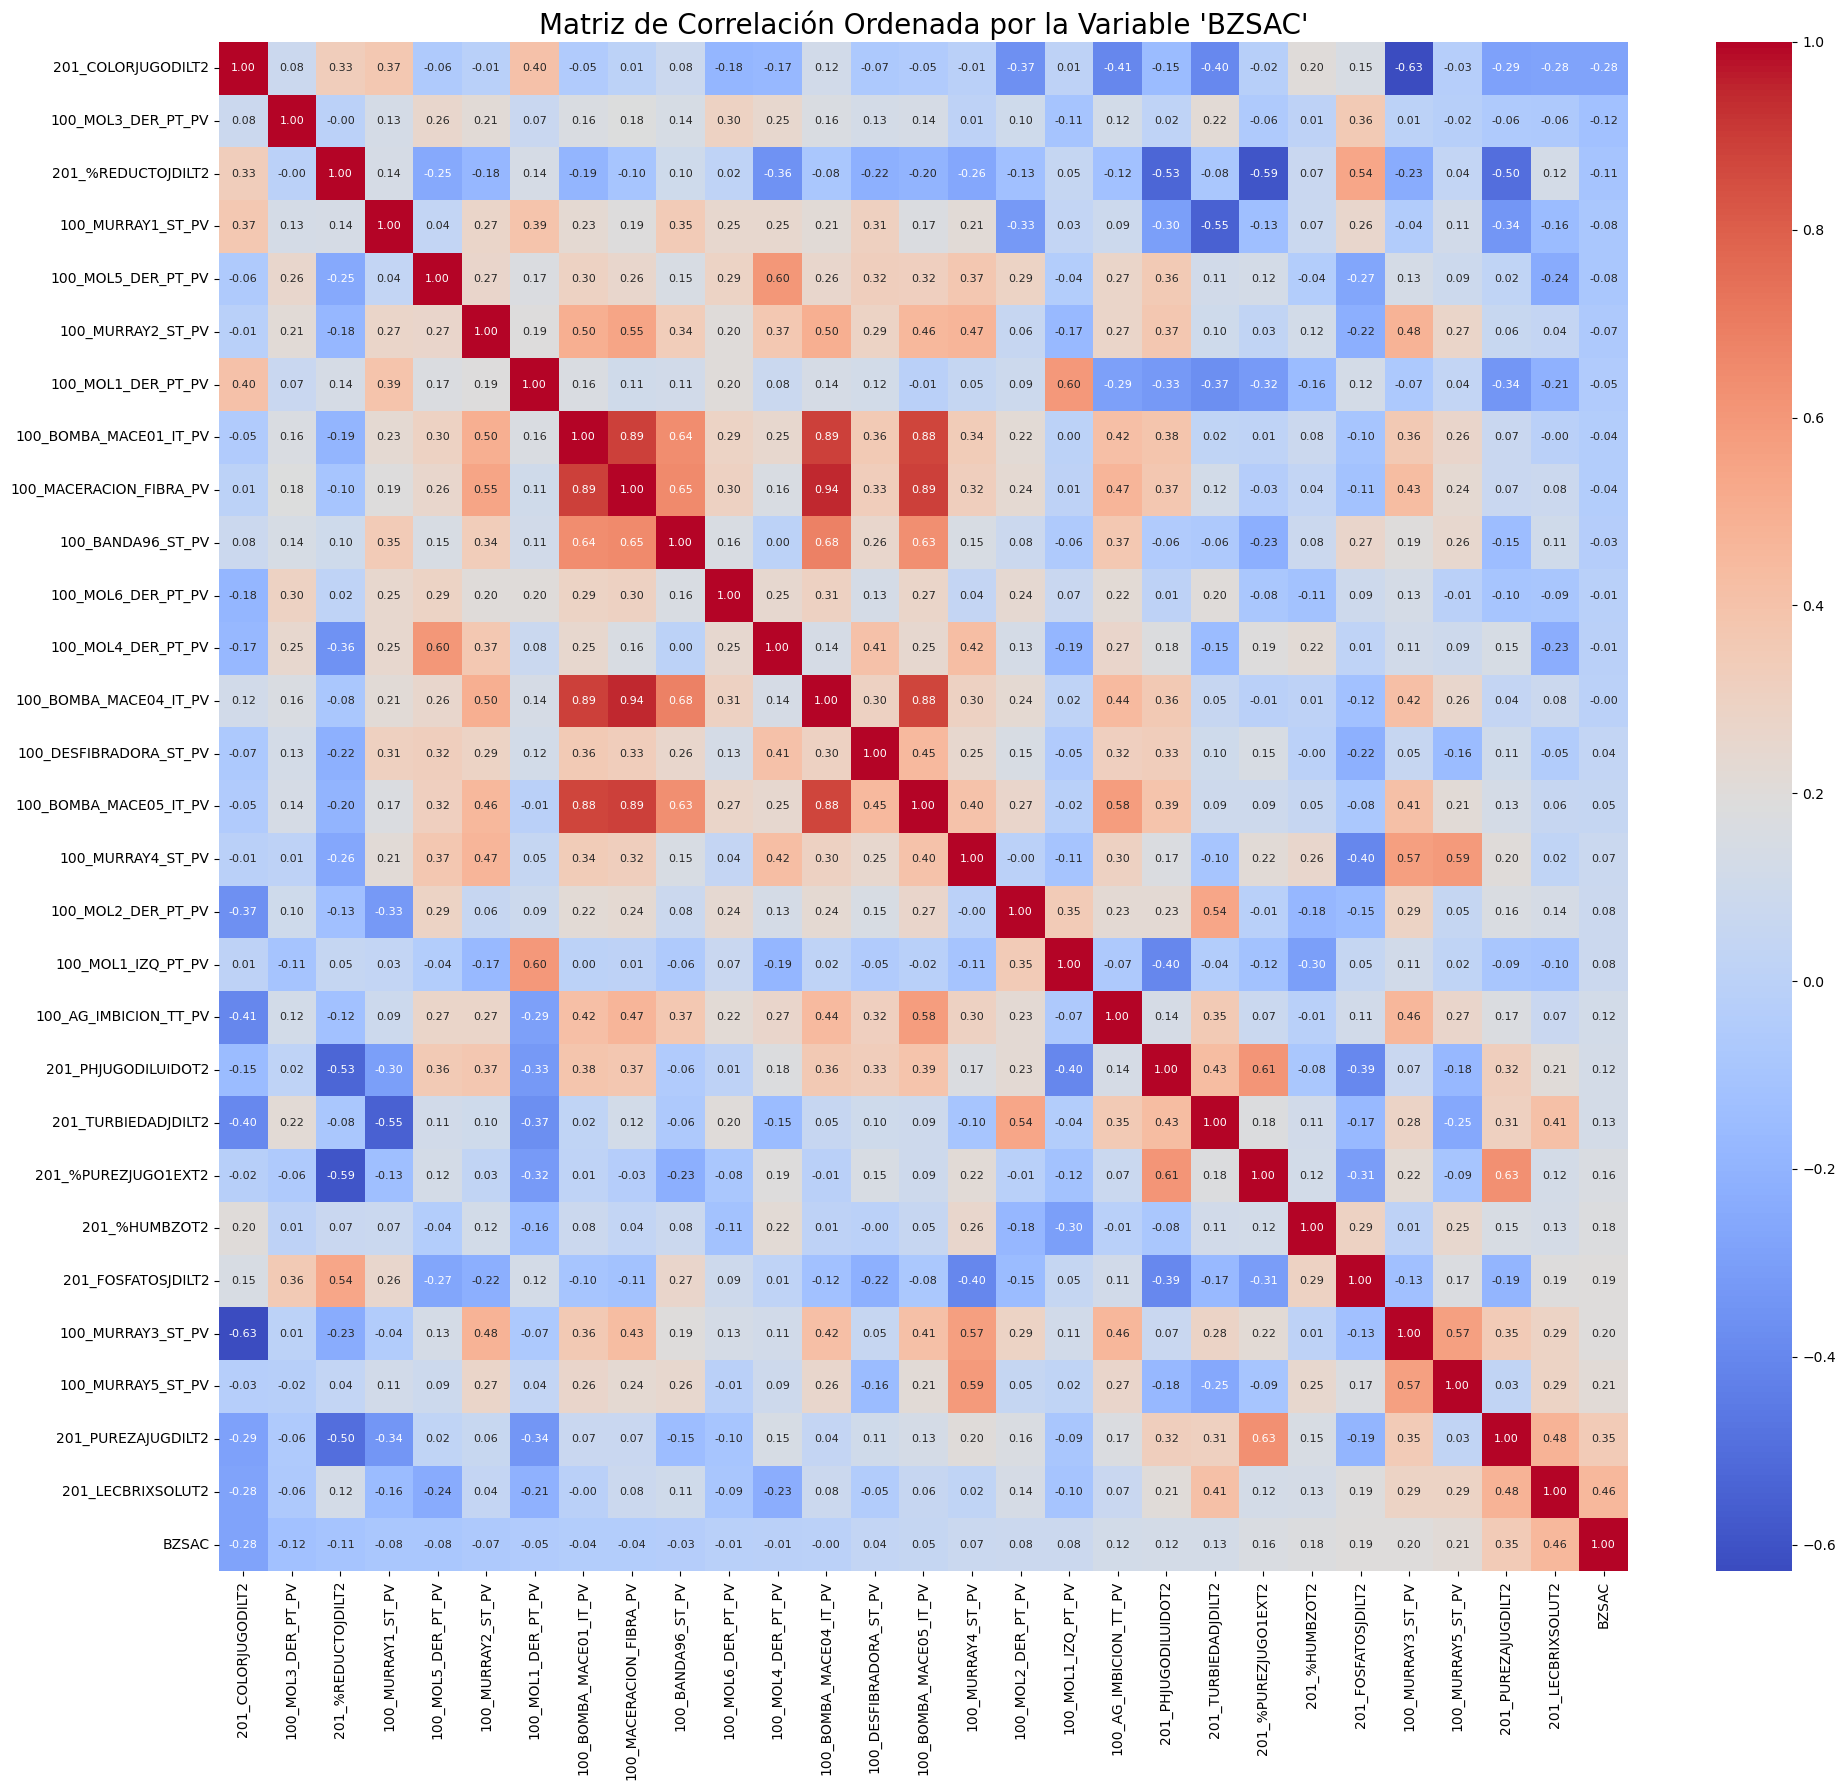


Correlaciones de 'BZSAC' ordenadas de menor a mayor:
201_COLORJUGODILT2        -0.282893
100_MOL3_DER_PT_PV        -0.121062
201_%REDUCTOJDILT2        -0.105275
100_MURRAY1_ST_PV         -0.081969
100_MOL5_DER_PT_PV        -0.081857
100_MURRAY2_ST_PV         -0.065555
100_MOL1_DER_PT_PV        -0.053222
100_BOMBA_MACE01_IT_PV    -0.039853
100_MACERACION_FIBRA_PV   -0.036892
100_BANDA96_ST_PV         -0.034193
100_MOL6_DER_PT_PV        -0.011817
100_MOL4_DER_PT_PV        -0.011125
100_BOMBA_MACE04_IT_PV    -0.003200
100_DESFIBRADORA_ST_PV     0.036834
100_BOMBA_MACE05_IT_PV     0.048102
100_MURRAY4_ST_PV          0.074783
100_MOL2_DER_PT_PV         0.079469
100_MOL1_IZQ_PT_PV         0.083993
100_AG_IMBICION_TT_PV      0.118068
201_PHJUGODILUIDOT2        0.124069
201_TURBIEDADJDILT2        0.125456
201_%PUREZJUGO1EXT2        0.162679
201_%HUMBZOT2              0.176681
201_FOSFATOSJDILT2         0.192761
100_MURRAY3_ST_PV          0.195910
100_MURRAY5_ST_PV          0.211961
201_PUREZA

In [35]:

# 1. Calcular la matriz de correlación
correlation_matrix = df_resample_1h.corr(method='spearman')

# 2. Seleccionar la fila de correlaciones de la variable objetivo 'BZSAC'
correlations_with_target = correlation_matrix['BZSAC']

# 3. Ordenar las correlaciones en orden ascendente (de menor a mayor)
sorted_correlations = correlations_with_target.sort_values(ascending=True)

# 4. Reordenar la matriz de correlación para la visualización
# Esto se hace para que el heatmap muestre las variables en el orden deseado
ordered_columns = sorted_correlations.index
ordered_correlation_matrix = correlation_matrix.loc[ordered_columns, ordered_columns]

# 5. Visualizar la matriz de correlación ordenada
plt.figure(figsize=(20, 18))
sns.heatmap(
    ordered_correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.title("Matriz de Correlación Ordenada por la Variable 'BZSAC'", fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Para ver solo las correlaciones de 'BZSAC' en una Serie ordenada
print("\nCorrelaciones de 'BZSAC' ordenadas de menor a mayor:")
print(sorted_correlations)

Al observar los datos, en especial la matriz de correlacion se  seleccionan las siguientes 2 variables: 

* 0	201_LECBRIXSOLUT2	Lectura Brix Solucion Jugo Diluido T2
* 1	201_PUREZAJUGDILT2	% PUREZA JUGO DILUIDO TANDEM 2

Por sugerencia del dominio de negocio (dada la dinamica del proceso), se listan tambien las siguientes variables:

* 100_MURRAY5_ST_PV          
* 100_MURRAY3_ST_PV
* 201_%HUMBZOT2              


Se grafican los valores nulos de las variables mas correlacionadas

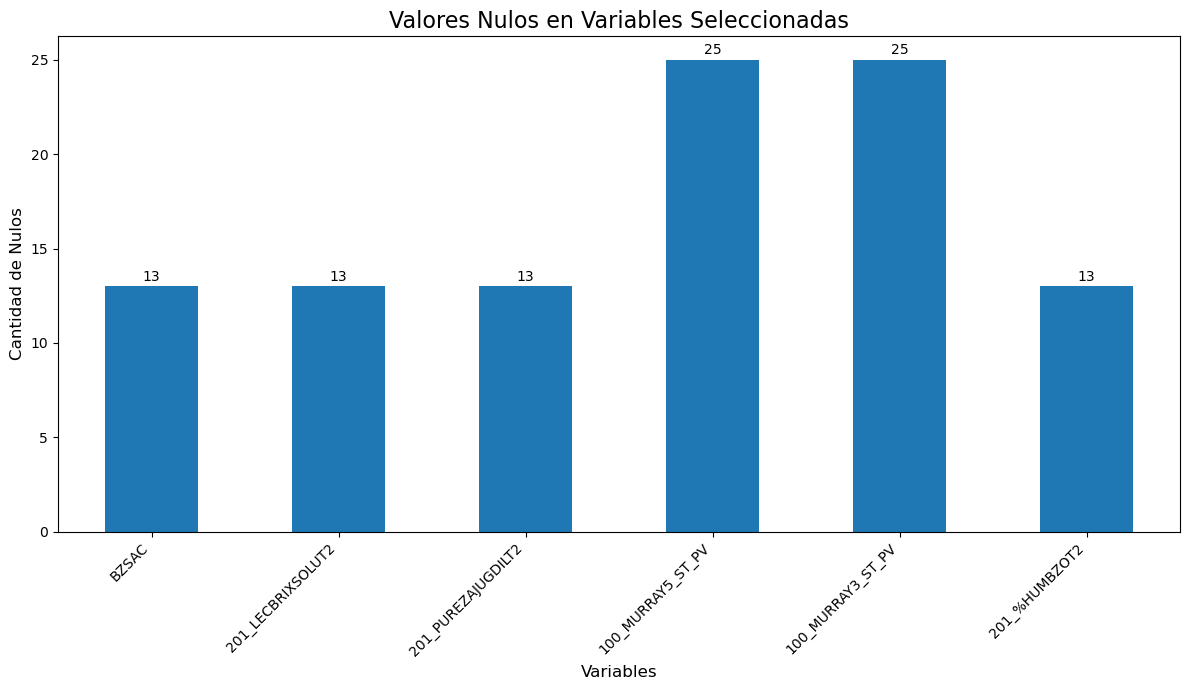

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de las columnas específicas que quieres analizar, incluyendo 'BZSAC'
columnas_seleccionadas = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# Contar los valores nulos solo para las columnas seleccionadas
nulos_seleccionados = df_resample_1h[columnas_seleccionadas].isnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(12, 7)) 
ax = nulos_seleccionados.plot(kind="bar")

# Ajustar la posición vertical del contador sobre cada barra
for i, v in enumerate(nulos_seleccionados):
    # Ajusta el valor '1' para controlar la distancia del texto a la barra
    ax.text(i, v + 0.3, str(v), color='black', ha='center')


plt.title("Valores Nulos en Variables Seleccionadas", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Cantidad de Nulos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Ahora se genera la matriz de correlacion solo para las variables mas correlacionadas con nuestra varibale objetivo**

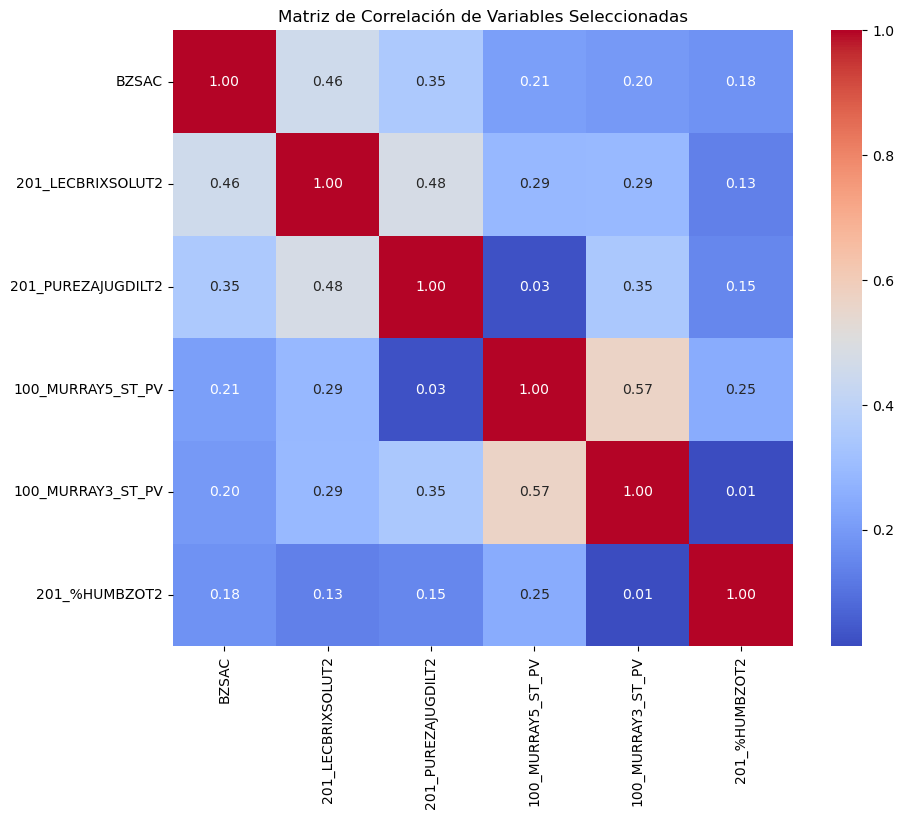

In [44]:

# 1. Define las variables de interés
variables_interes = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# 2. Crea un subconjunto del DataFrame con esas variables
df_sub = df_resample_1h[variables_interes].copy()

# 3. Calcula la matriz de correlación para el subconjunto
correlation_matrix_sub = df_sub.corr(method='spearman')

# 4. Visualiza la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sub, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()

**Eliminar los datos nulos**

Teniendo en cuenta que **la cantidad de valores nulos por variable es considerablemente menor en comparación con el total de registros**, se optó por **eliminar** aquellos **registros** que presentan valores faltantes.

In [45]:
# Lista de las columnas específicas en las que quieres eliminar nulos
columnas_con_nulos = ['201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# Eliminar las filas donde al menos una de las columnas de la lista tenga un valor nulo
df_sin_nulos = df_resample_1h.dropna(subset=columnas_con_nulos)

# Opcional: imprimir las dimensiones de ambos DataFrames para verificar el cambio
print(f"Número de filas en el DataFrame original: {df_resample_1h.shape[0]}")
print(f"Número de filas en el DataFrame sin nulos: {df_sin_nulos.shape[0]}")

Número de filas en el DataFrame original: 303
Número de filas en el DataFrame sin nulos: 264


**Se vuelve a generar la matriz de correlacion Spearman para las variables seleccionadas y se analiza el cambio de valores**

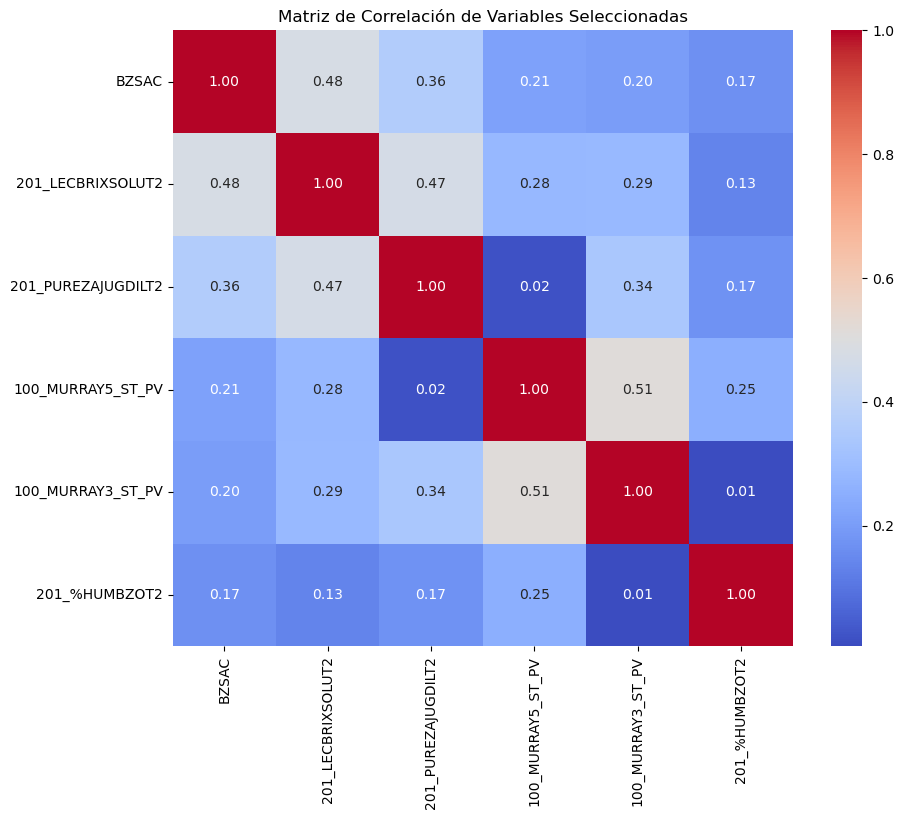

In [46]:

# 1. Define las variables de interés
variables_interes = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# 2. Crea un subconjunto del DataFrame con esas variables
df_sub = df_sin_nulos[variables_interes].copy()

# 3. Calcula la matriz de correlación para el subconjunto
correlation_matrix_sub = df_sub.corr(method='spearman')

# 4. Visualiza la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sub, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()

In [66]:

print(lower, upper)

# Identificar outliers
outliers = df[(df["BZSAC"] < lower) | (df["BZSAC"] > upper)]

# Porcentaje de outliers
pct_outliers = len(outliers) / len(df) * 100
print(f"Porcentaje de outliers: {pct_outliers:.2f}%")

# Mostrar momentos donde ocurren
print("Outliers encontrados en:")
print(outliers[["Time", "BZSAC"]].head())

0.87 1.63
Porcentaje de outliers: 0.03%
Outliers encontrados en:
                     Time  BZSAC
25674 2025-07-14 12:00:00   2.70
31983 2025-07-19 07:00:00   0.00
34523 2025-07-21 05:00:00   1.70
34904 2025-07-21 12:00:00   1.90
35012 2025-07-21 14:00:00   1.66


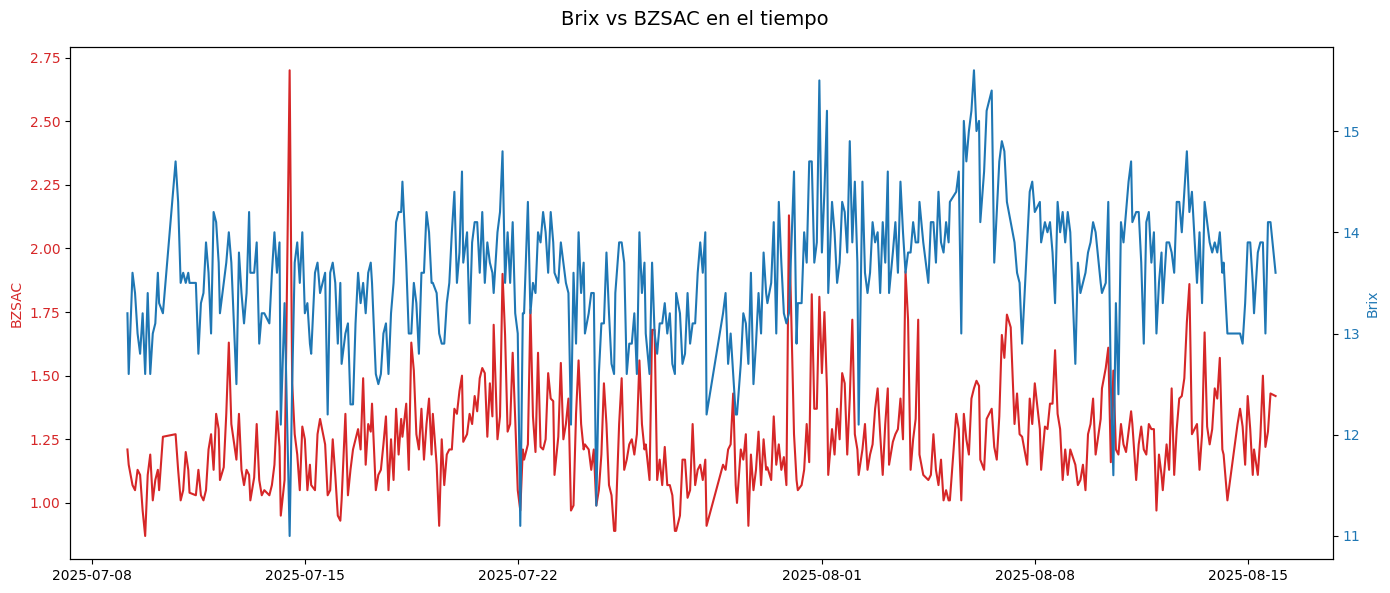

In [68]:


# Filtrar columnas necesarias
df_brix = df[['Time', 'BZSAC', '201_LECBRIXSOLUT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_brix['Time'], df_brix['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix['Time'], df_brix['201_LECBRIXSOLUT2'], color='tab:blue', label='Brix (Jugo diluido)')
ax2.set_ylabel('Brix', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle("Brix vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()



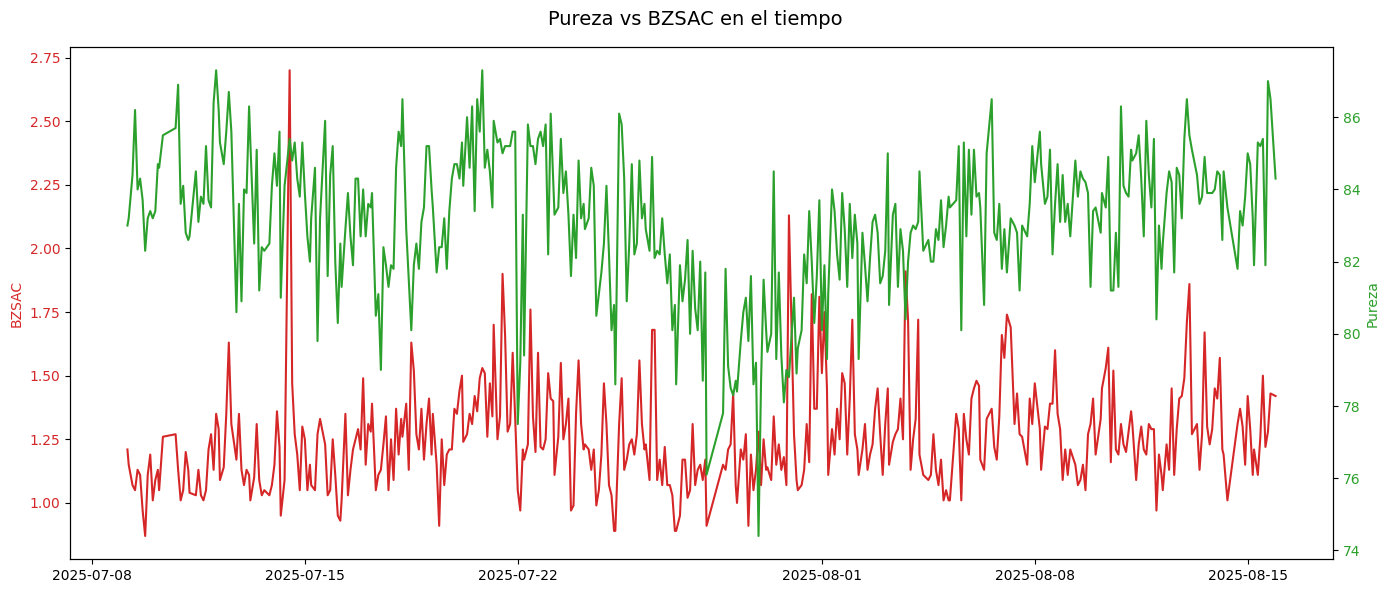

In [69]:
# Filtrar columnas necesarias
df_pureza = df[['Time', 'BZSAC', '201_PUREZAJUGDILT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_pureza['Time'], df_pureza['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_pureza['Time'], df_pureza['201_PUREZAJUGDILT2'], color='tab:green', label='Pureza (Jugo diluido)')
ax2.set_ylabel('Pureza', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.suptitle("Pureza vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()


📊 Correlaciones con BZSAC:
BZSAC                  1.000000
201_LECBRIXSOLUT2      0.441988
201_PUREZAJUGDILT2     0.274224
201_%HUMBZOT2          0.164404
201_%PUREZJUGO1EXT2    0.125280
Name: BZSAC, dtype: float64


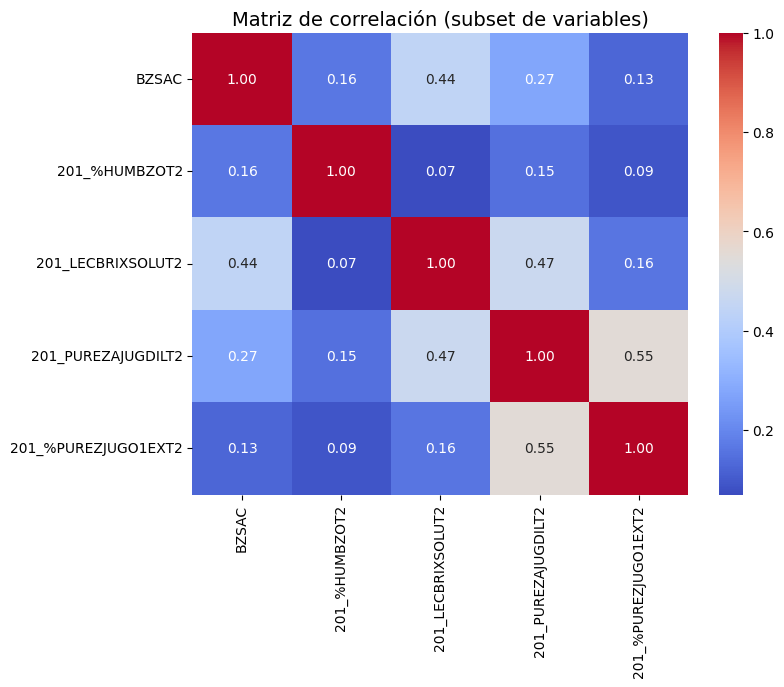


✅ Features recomendadas para el modelo de predicción:
['201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2']


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Cargar dataset ---
dxx = pd.read_csv("DatosAreaMolinos.csv", sep=";")

# --- 2. Seleccionar variables candidatas ---
variables_candidatas = [
    "BZSAC",          # Objetivo
    "201_%HUMBZOT2",      # Humedad bagazo
    "201_LECBRIXSOLUT2",  # Brix jugo diluido
    "201_PUREZAJUGDILT2", # Pureza jugo diluido
    "201_%PUREZJUGO1EXT2" # Pureza jugo primera extracción
]

# Filtrar solo las que existan en el dataset
variables_existentes = [v for v in variables_candidatas if v in dxx.columns]
df_subset = dxx[variables_existentes].copy()

# --- 3. Limpiar datos ---
# Eliminar nulos y ceros en la variable objetivo
df_subset = df_subset.dropna()
df_subset = df_subset[df_subset["BZSAC"] > 0]

# --- 4. Calcular correlaciones contra BZSAC ---
correlaciones = df_subset.corr(numeric_only=True)["BZSAC"].sort_values(ascending=False)

print("📊 Correlaciones con BZSAC:")
print(correlaciones)

# --- 5. Visualizar mapa de calor ---
plt.figure(figsize=(8,6))
sns.heatmap(df_subset.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (subset de variables)", fontsize=14)
plt.show()

# --- 6. Selección de features ---
# Recomendación: elegir las variables con mayor correlación (positiva o negativa)
umbral = 0.2  # puedes ajustar el umbral
features_seleccionadas = correlaciones[abs(correlaciones) > umbral].index.tolist()
features_seleccionadas = [f for f in features_seleccionadas if f != "BZSAC"]

print("\n✅ Features recomendadas para el modelo de predicción:")
print(features_seleccionadas)
